## Import modules

In [1]:
import scanpy as sc
import pandas as pd
pd.set_option('display.max_rows', 100)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

import os 
from matplotlib.patches import Rectangle
import itertools

In [2]:
import session_info
session_info.show()

In [3]:
# import a module given the full path?
import importlib.util
import sys
spec = importlib.util.spec_from_file_location("module.name", "/home/jovyan/projects/P46_Adult-heart_Visium/notebooks/ver8regions_torepo/post_cpdb.py")
post_cpdb = importlib.util.module_from_spec(spec)
sys.modules["module.name"] = post_cpdb
spec.loader.exec_module(post_cpdb)

In [4]:
fig_dir = '/home/jovyan/projects/P46_Adult-heart_Visium/notebooks/Revision/figures'

In [5]:
interaction_metadata = pd.read_csv('/nfs/team205/heart/cellphonedb/customDB/interaction_meta/interaction_metadata_2023-1-2.csv')

## Add metadata for TGFb superfamily

In [8]:
import sqlite3
con = sqlite3.connect('/nfs/team205/heart/cellphonedb/customDB/cellphonedb_user_2022-11-23-14_50.db')
cur = con.cursor()

cur. execute("SELECT name FROM sqlite_master WHERE type='table';")

# read in each table
protein_table = pd.read_sql_query("SELECT * from protein_table", con)
multi_table = pd.read_sql_query("SELECT * from multidata_table", con)
inter_table = pd.read_sql_query("SELECT * from interaction_table", con)
gene_table = pd.read_sql_query("SELECT * from gene_table", con)
complex_table = pd.read_sql_query("SELECT * from complex_composition_table", con)

# merge gene and protein table
gene_protein_table = gene_table.merge(protein_table,how='left',left_on='protein_id',right_on='id_protein')

In [9]:
genes = list(pd.read_csv('/nfs/team205/kk18/data/geneset/HGNC/HGNC_GID1932_Transforming-growth-factor-beta-superfamily.txt',sep='\t')['Approved symbol'].unique())
print(genes)

# protein ids
ids = list(gene_protein_table[gene_protein_table['hgnc_symbol'].isin(genes)]['protein_multidata_id'])
interaction_metadata['TGFb-sf_GID1932'] = (interaction_metadata['multidata_1_id'].isin(ids)|interaction_metadata['multidata_2_id'].isin(ids))

# revise receptor labels
# genes in GID1932 are all ligands (TGFb superfamily)
## get index
index_1 = interaction_metadata['multidata_1_id'].isin(ids)
index_2 = interaction_metadata['multidata_2_id'].isin(ids)

## revise as receptor=0
interaction_metadata.loc[index_1,'receptor_1'] = 0
interaction_metadata.loc[index_1,'receptor_2'] = 1
interaction_metadata.loc[index_2,'receptor_2'] = 0
interaction_metadata.loc[index_2,'receptor_1'] = 1   

interaction_metadata[interaction_metadata['TGFb-sf_GID1932']]

['BMP1', 'BMP10', 'BMP15', 'BMP2', 'BMP3', 'BMP4', 'BMP5', 'BMP6', 'BMP7', 'BMP8A', 'BMP8B', 'INHA', 'INHBA', 'INHBB', 'INHBC', 'INHBE', 'TGFB1', 'TGFB2', 'TGFB3', 'AMH', 'GDF1', 'GDF10', 'GDF11', 'GDF15', 'GDF2', 'GDF3', 'GDF5', 'GDF6', 'GDF7', 'MSTN', 'GDF9', 'LEFTY1', 'LEFTY2', 'NODAL']


,id_interaction,id_cp_interaction,multidata_1_id,multidata_2_id,source,annotation_strategy,name_1,receptor_1,integrin_1,name_2,...,Wnt family,Glycoside hydrolase family 1,Bone morphogenetic proteins,LGIC,GPCR,TransSynapse,GPCR_butnot_TransSynapse,Angiogenesis,Innervation,TGFb-sf_GID1932
367,368,CPI-CS075F8740C,1370,135,PMID:25136781,user_curated,ACVL1_ACVR2A,1,0,O95393,...,False,False,True,False,False,False,False,False,False,True
368,369,CPI-CS0A97B38B6,1371,135,PMID:22710174,user_curated,ACVL1_BMPR2,1,0,O95393,...,False,False,True,False,False,False,False,False,False,True
369,370,CPI-CS01C579B4C,1370,1313,PMID:25136781,user_curated,ACVL1_ACVR2A,1,0,Q9UK05,...,False,False,False,False,False,False,False,False,False,True
370,371,CPI-CS0157F2E34,1371,1313,PMID:22710174,user_curated,ACVL1_BMPR2,1,0,Q9UK05,...,False,False,False,False,False,False,False,False,False,True
371,372,CPI-CS08CC8F9D3,1372,438,PMID:22710174,user_curated,ACVR1_BMPR2,1,0,P18075,...,False,False,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2454,2455,CPI-SC0202406F0,342,1709,reactome,user_curated,P10600,0,1,integrin_aVb8_complex,...,False,False,False,False,False,False,False,False,False,True
2735,2736,CPI-SS0D53B88CC,549,807,PMID:22710174,user_curated,P27037,1,1,P55103,...,False,False,False,False,False,False,False,False,False,True
2736,2737,CPI-SS099C401F7,549,821,PMID:22710174,user_curated,P27037,1,1,P58166,...,False,False,False,False,False,False,False,False,False,True
2817,2818,CPI-SS04BE14432,807,923,PMID:22710174,user_curated,P55103,0,1,Q13705,...,False,False,False,False,False,False,False,False,False,True


## Plot

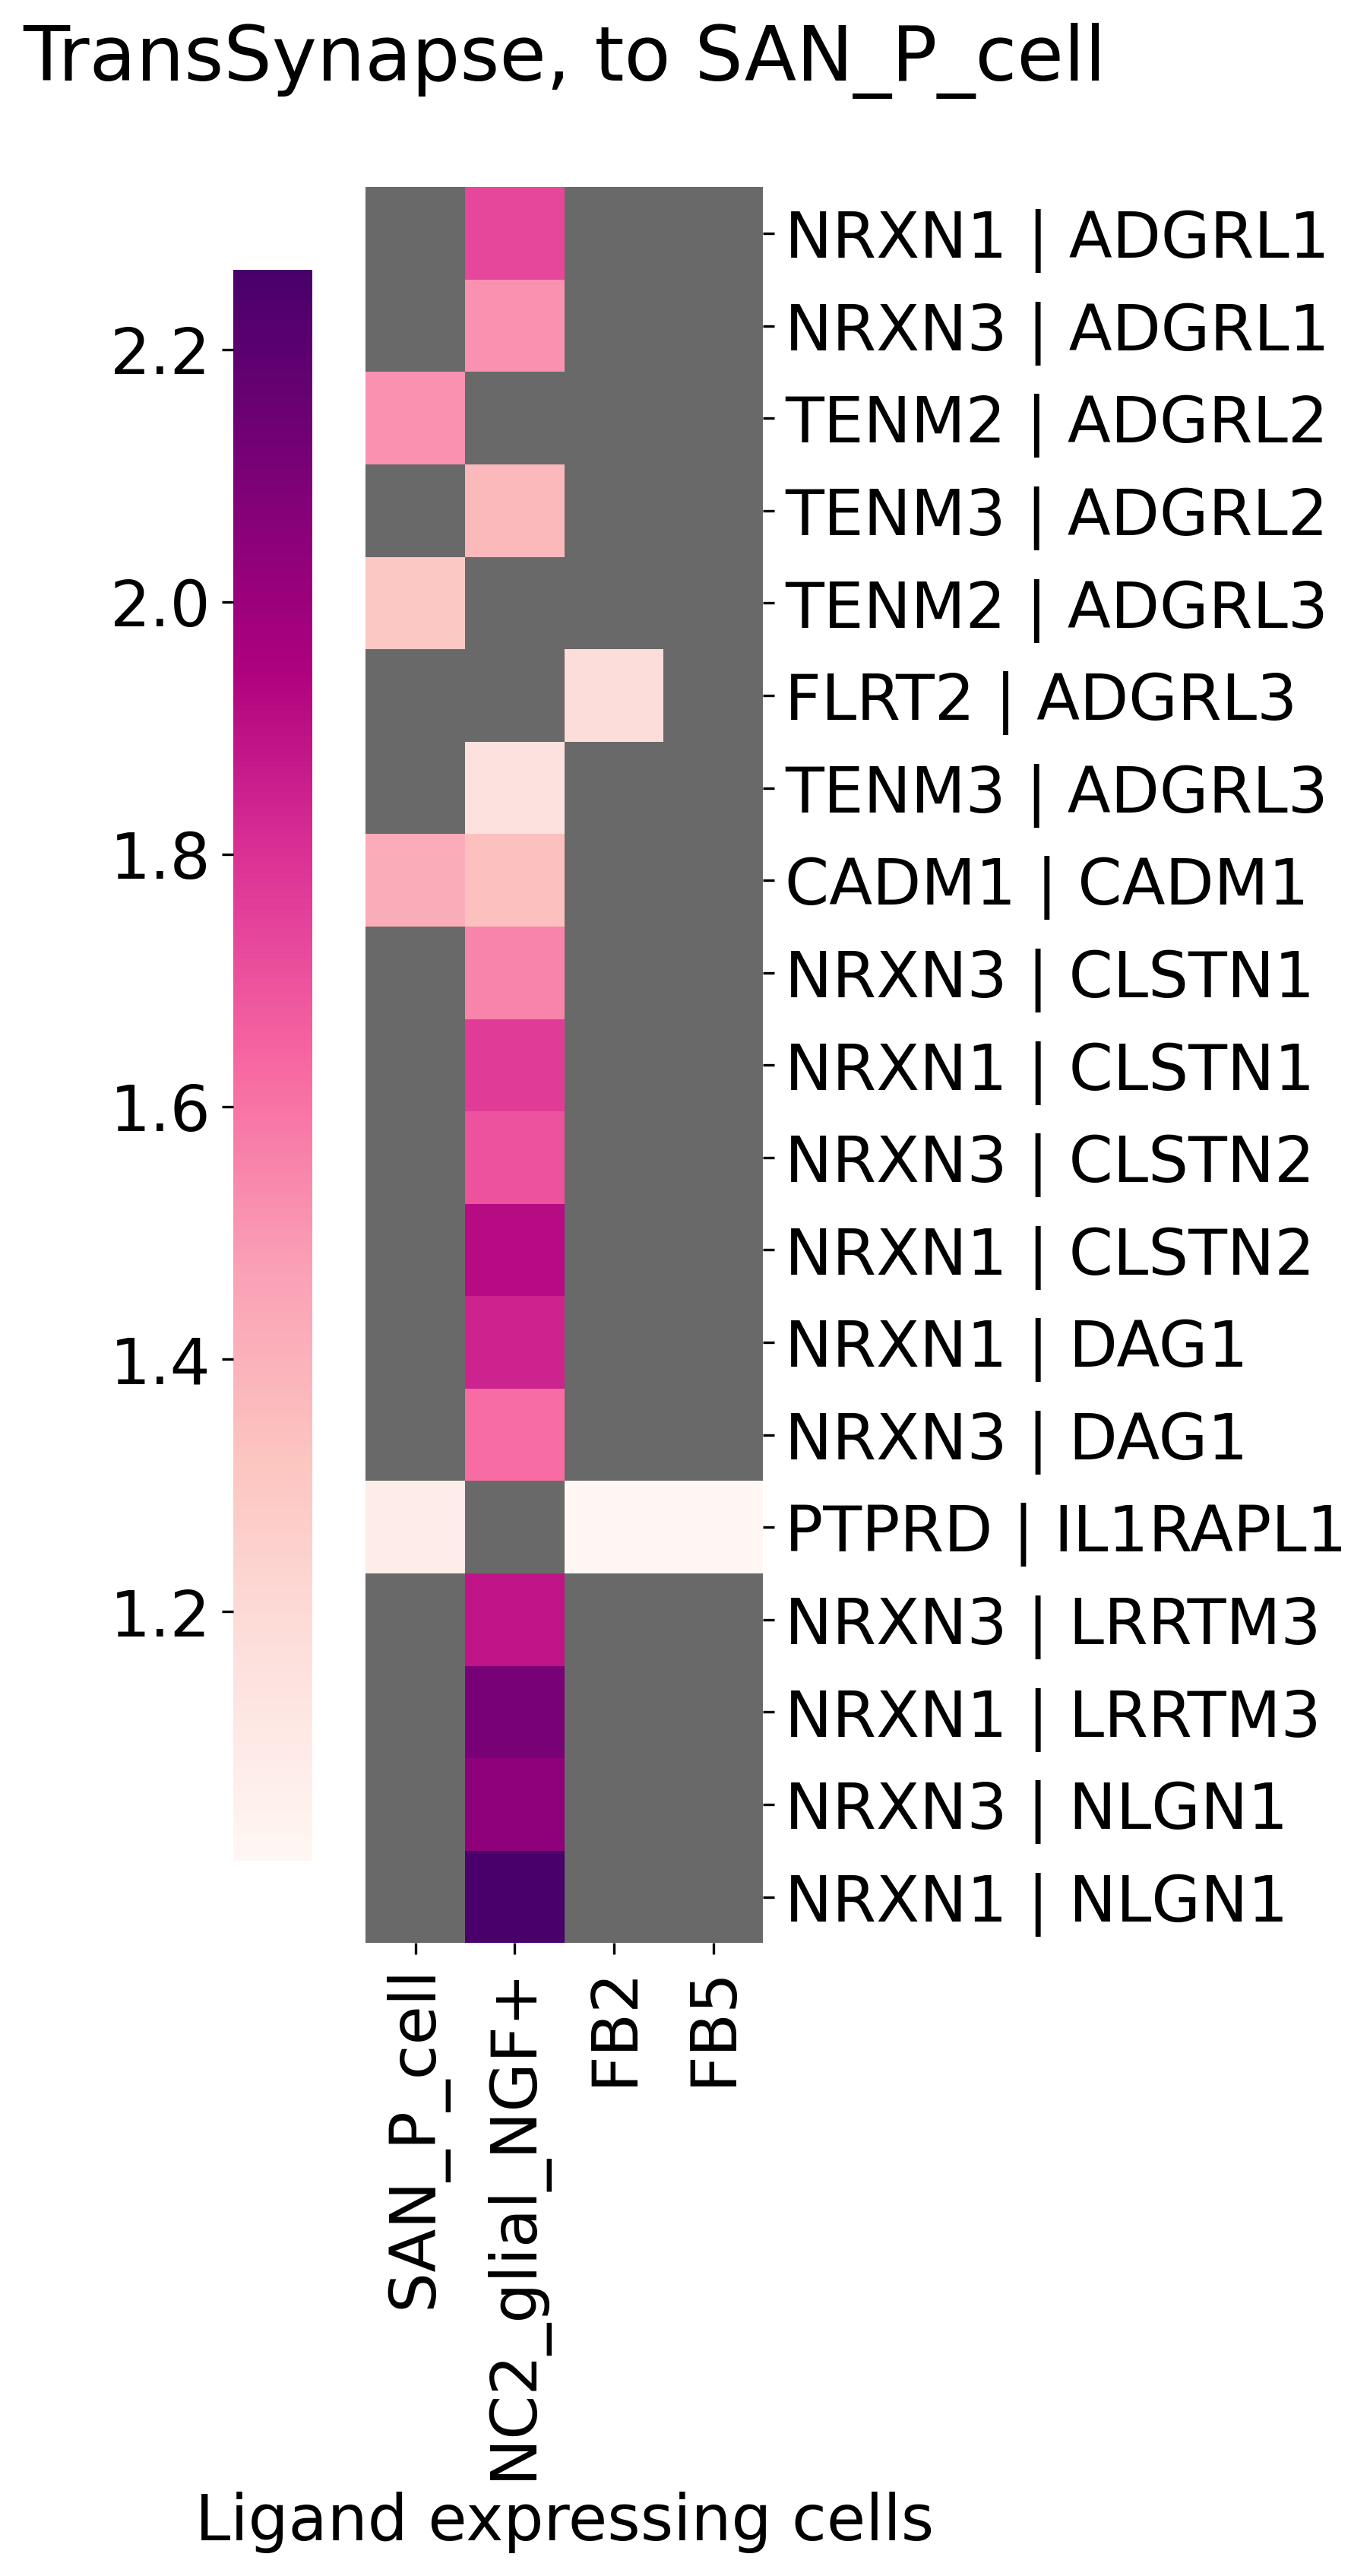

In [17]:
path_to_cpdb = '/nfs/team205/heart/cellphonedb/SAN_onlymicroenv_SAN_0.1'

cpdbout_means = pd.read_table(f'{path_to_cpdb}/means.txt',index_col=0)
cpdbout_pvals = pd.read_table(f'{path_to_cpdb}/pvalues.txt',index_col=0)

post_cpdb.plot_CCI(cpdbout_means = cpdbout_means,
         target_celltype = 'SAN_P_cell',
         ligand_or_receptor = 'receptor',
         cpdbout_pvals = cpdbout_pvals,
         pvelue_thresh = 0.05,
         mean_thresh=1,
         category_column = ['TransSynapse'],
         interaction_metadata = interaction_metadata,
         microenvcells_to_plot = ['SAN_P_cell', 'NC2_glial_NGF+','FB4_activated','FB2','FB5','LYVE1+IGF1+MP'],
         fig_width=3,
             fig_hight=10,
         title='TransSynapse, to SAN_P_cell',
         title_fontsize=24,
         title_hight=1.05
        )


plt.savefig(f'{fig_dir}/CCI_SAN_TransSynapse-toSANP.pdf',
           bbox_inches='tight')

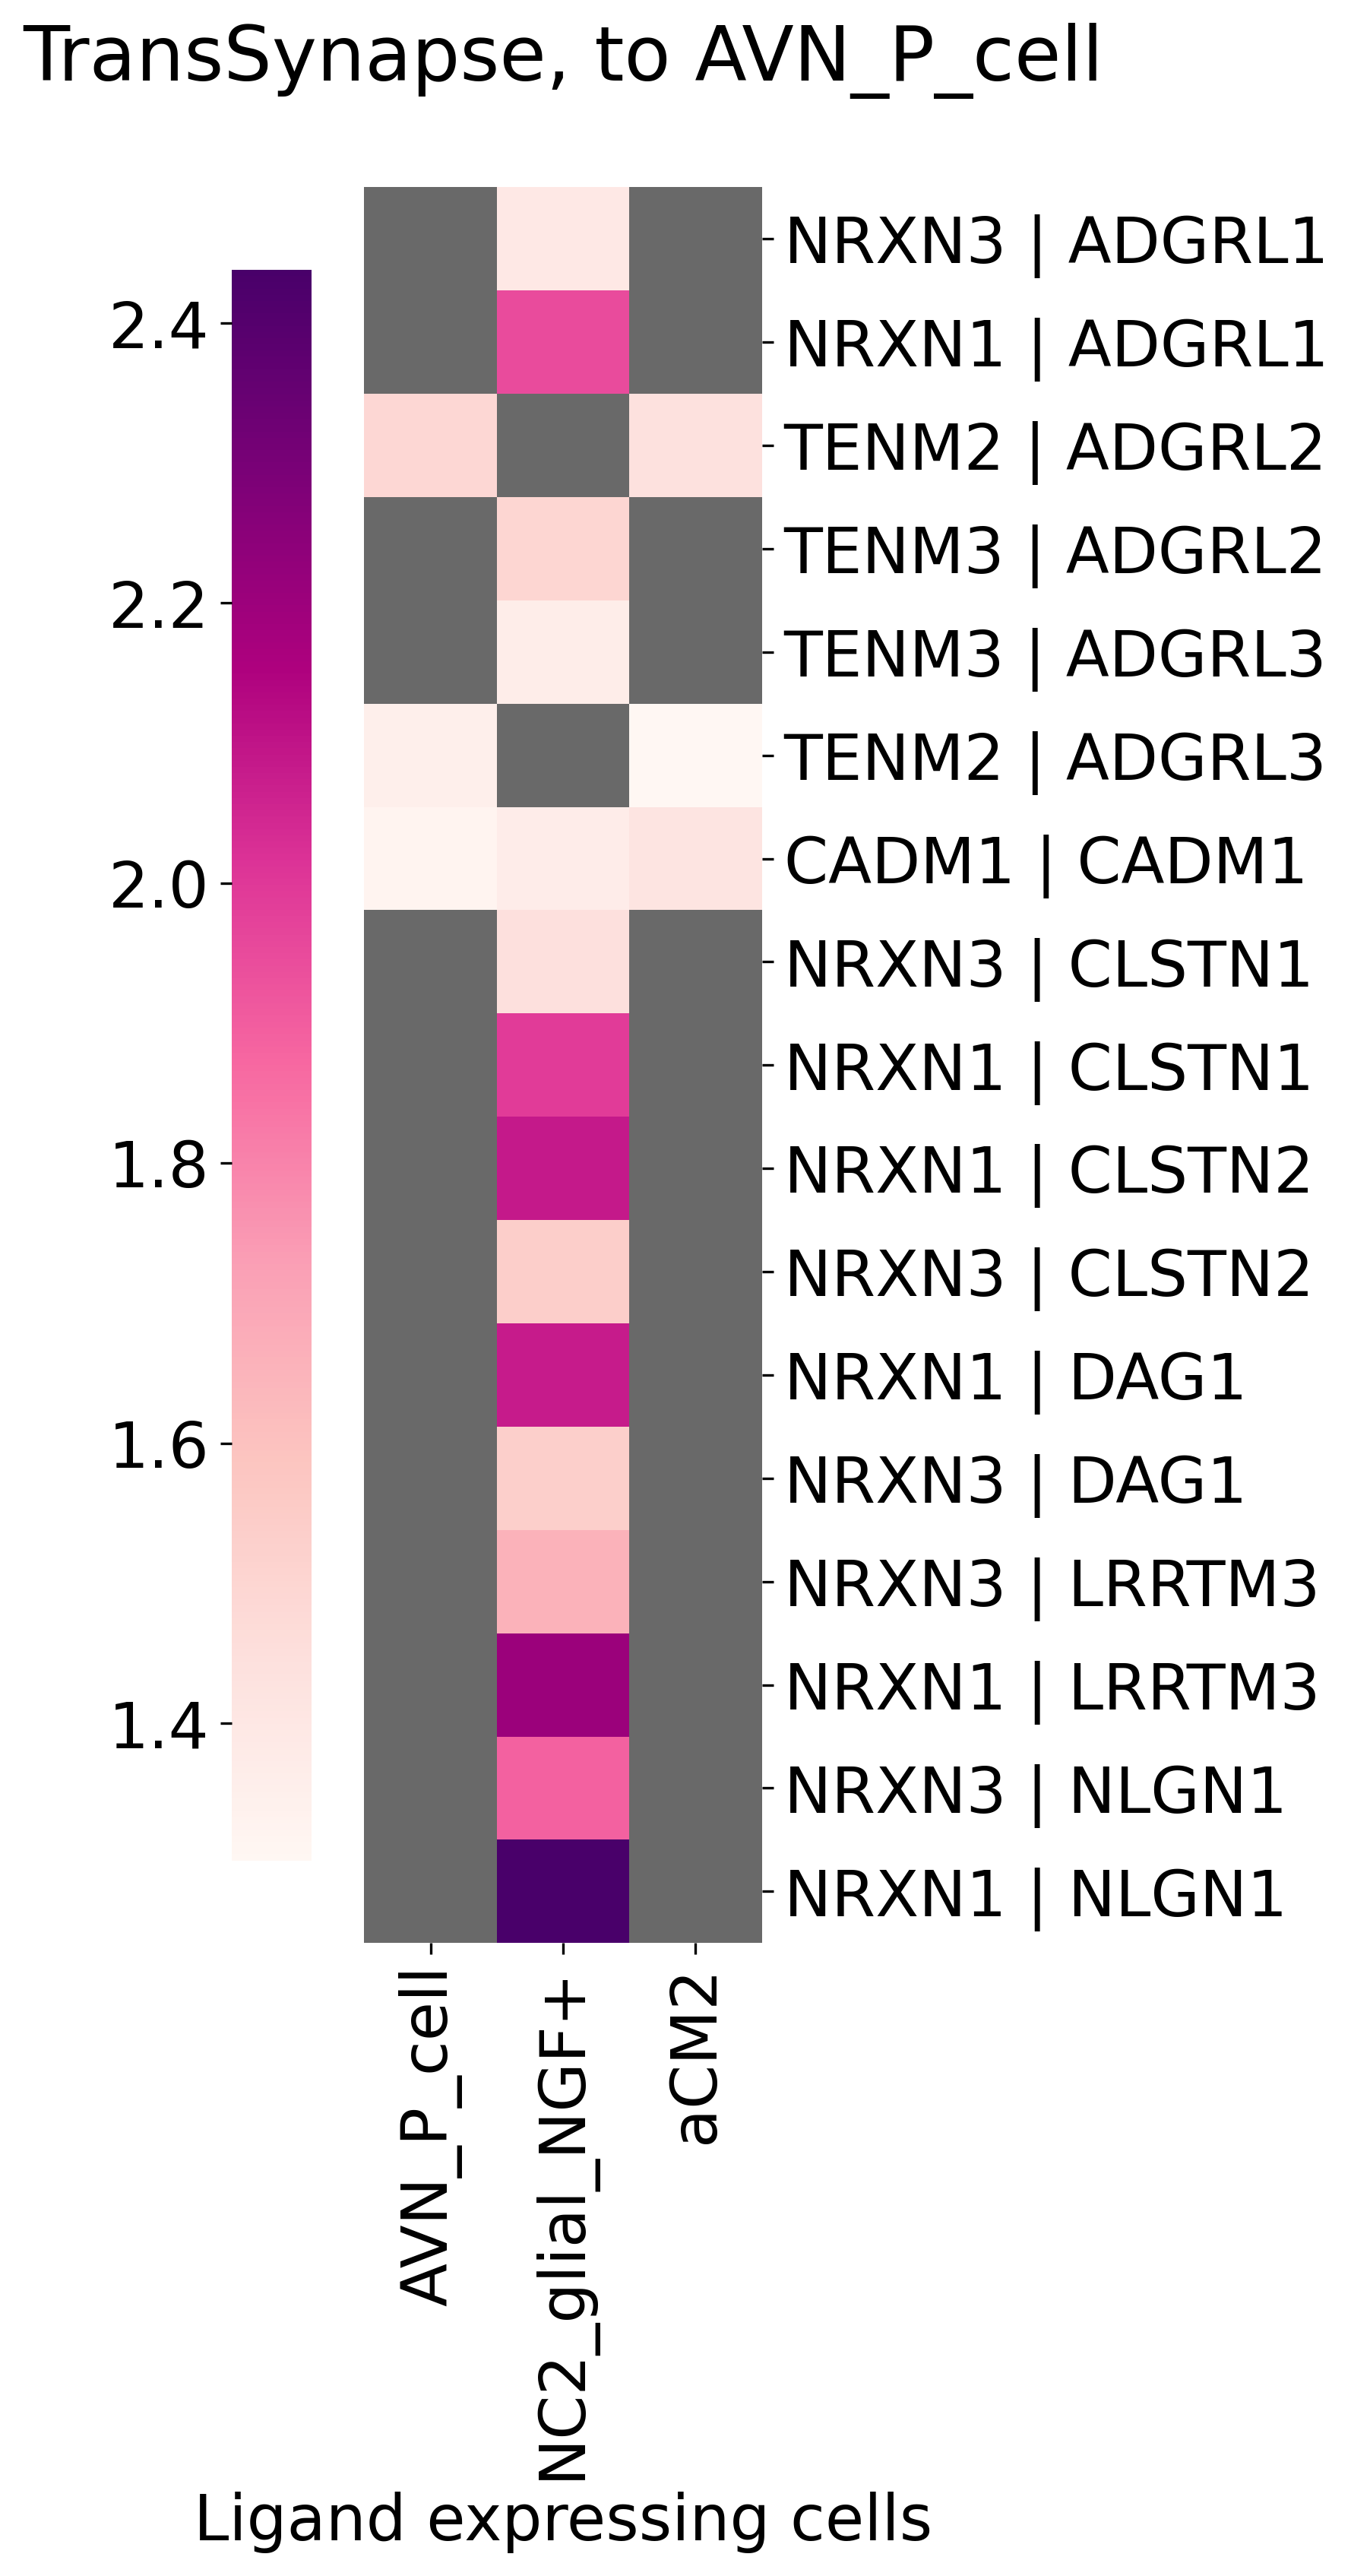

In [44]:
path_to_cpdb = '/nfs/team205/heart/cellphonedb/AVN_onlymicroenv_AVN_0.1'

cpdbout_means = pd.read_table(f'{path_to_cpdb}/means.txt',index_col=0)
cpdbout_pvals = pd.read_table(f'{path_to_cpdb}/pvalues.txt',index_col=0)

post_cpdb.plot_CCI(cpdbout_means = cpdbout_means,
         target_celltype = 'AVN_P_cell',
         ligand_or_receptor = 'receptor',
         cpdbout_pvals = cpdbout_pvals,
         pvelue_thresh = 0.05,
         mean_thresh=1,
         category_column = ['TransSynapse'],
         interaction_metadata = interaction_metadata,
         microenvcells_to_plot = ['AVN_P_cell',
                                 'NC2_glial_NGF+',
                                 'FB2',
                                 'aCM2',
                                 'LYVE1+IGF1+MP',
                                 'SMC1_basic',
                                 'SMC2_art',
                                 'FB5',
                                 'Mast',
                                 'FB1'],
         fig_width=3,
             fig_hight=10,
         title='TransSynapse, to AVN_P_cell',
         title_fontsize=24,
         title_hight=1.05
        )


plt.savefig(f'{fig_dir}/CCI_AVN_TransSynapse-toAVNP.pdf',
           bbox_inches='tight')

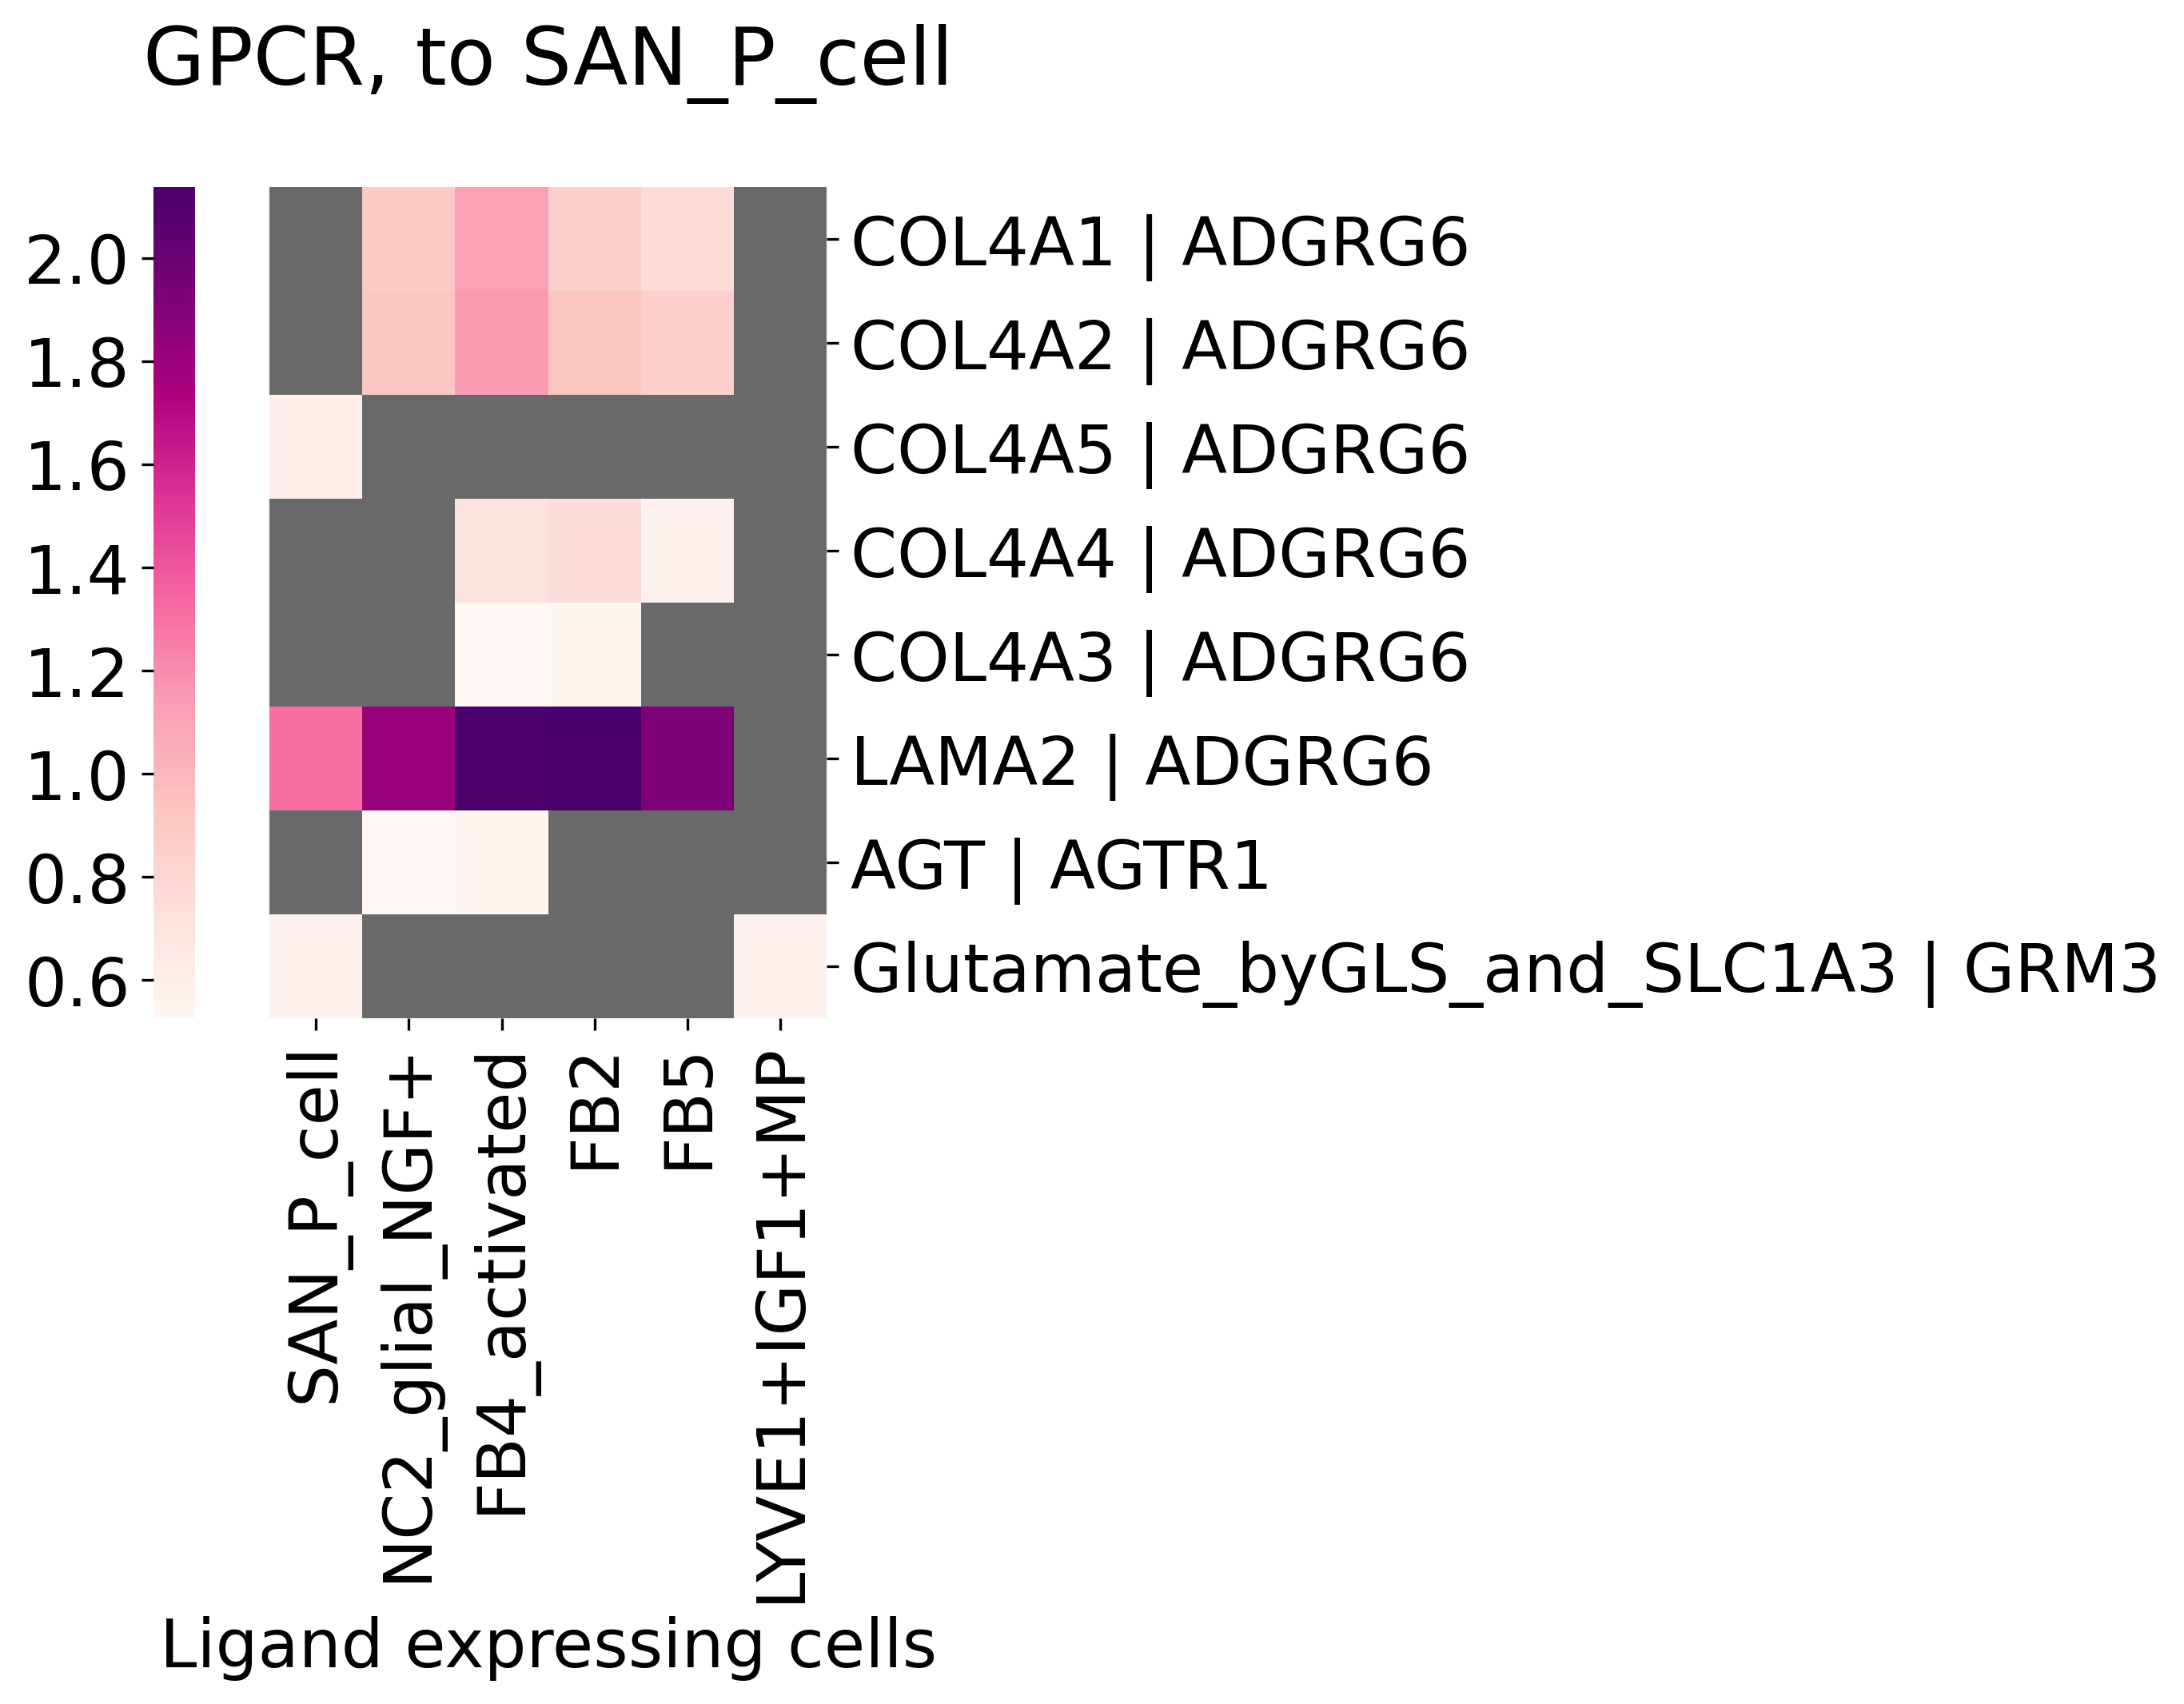

In [76]:
path_to_cpdb = '/nfs/team205/heart/cellphonedb/SAN_onlymicroenv_SAN_0.1'

cpdbout_means = pd.read_table(f'{path_to_cpdb}/means.txt',index_col=0)
cpdbout_pvals = pd.read_table(f'{path_to_cpdb}/pvalues.txt',index_col=0)

post_cpdb.plot_CCI(cpdbout_means = cpdbout_means,
         target_celltype = 'SAN_P_cell',
         ligand_or_receptor = 'receptor',
         cpdbout_pvals = cpdbout_pvals,
         pvelue_thresh = 0.05,
         mean_thresh=0.5,
         category_column = ['GPCR_butnot_TransSynapse'],
         interaction_metadata = interaction_metadata,
         microenvcells_to_plot = ['SAN_P_cell', 'NC2_glial_NGF+','FB4_activated','FB2','FB5','LYVE1+IGF1+MP'],
         fig_width=4,
             fig_hight=4.5,
         title='GPCR, to SAN_P_cell',
         title_fontsize=24,
         title_hight=1.1
        )

plt.savefig(f'{fig_dir}/CCI_SAN_GPCR-toSANP.pdf',
            bbox_inches='tight')

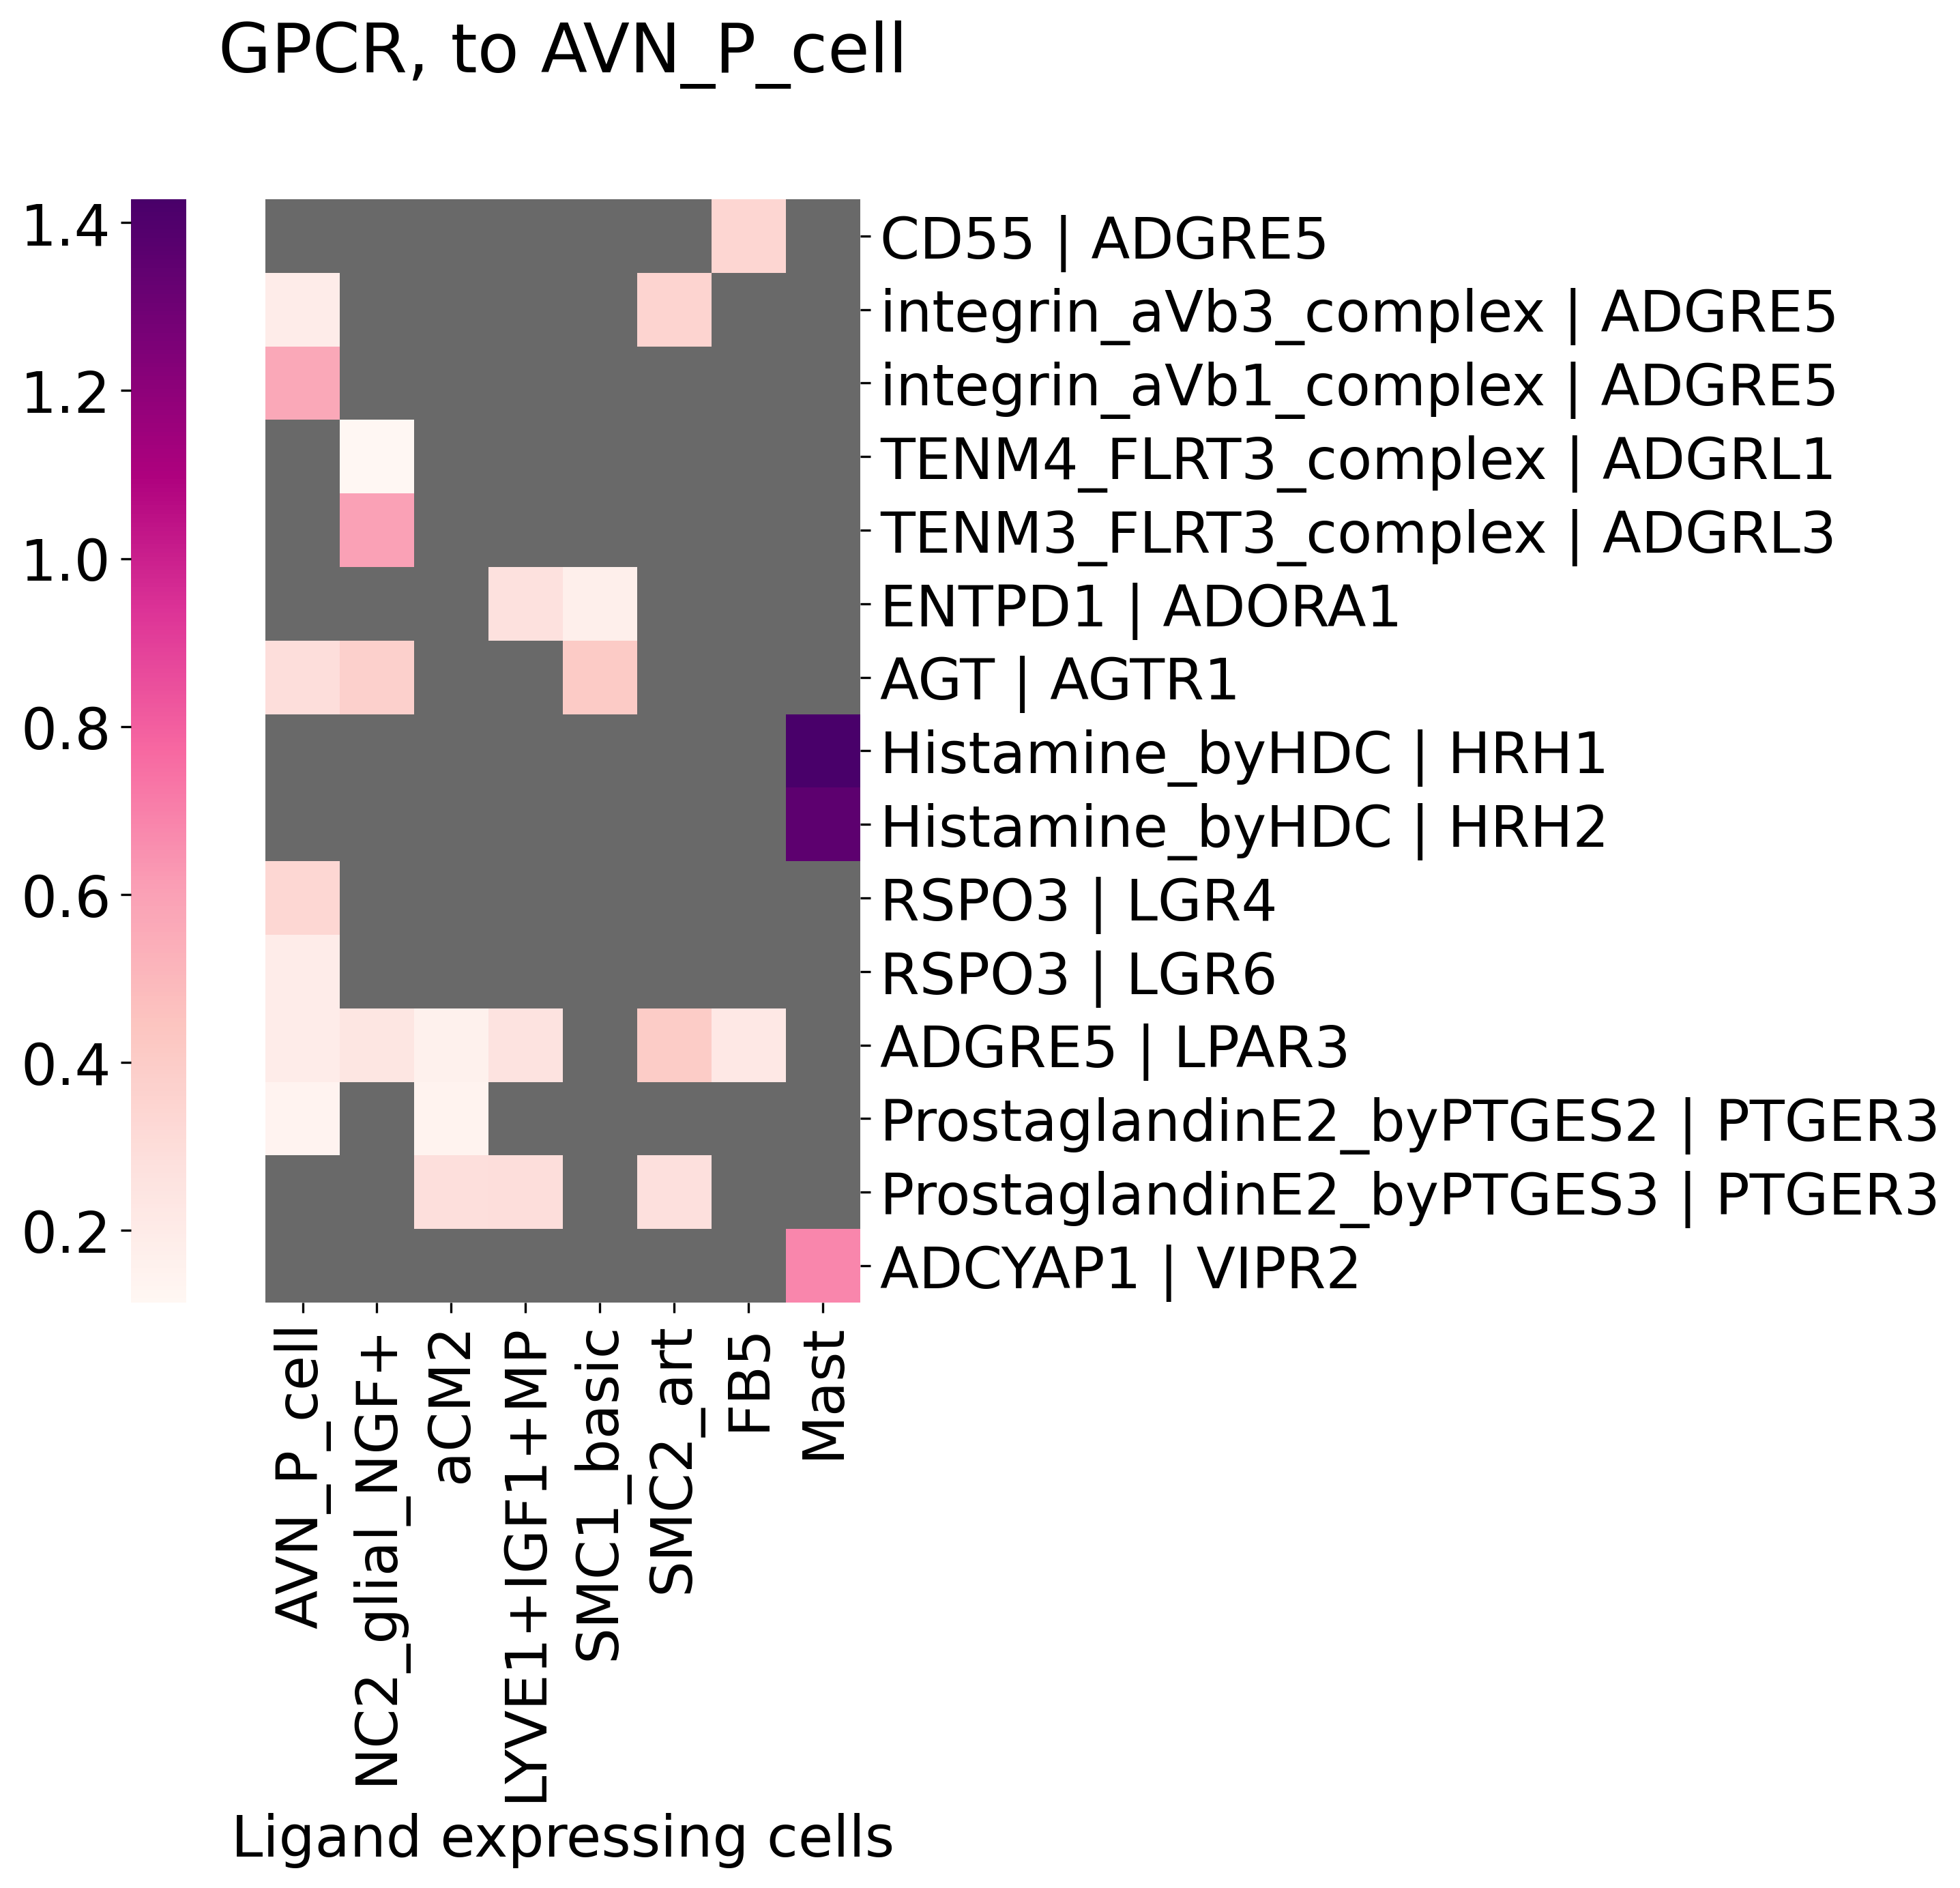

In [83]:
path_to_cpdb = '/nfs/team205/heart/cellphonedb/AVN_onlymicroenv_AVN_0.1'

cpdbout_means = pd.read_table(f'{path_to_cpdb}/means.txt',index_col=0)
cpdbout_pvals = pd.read_table(f'{path_to_cpdb}/pvalues.txt',index_col=0)

post_cpdb.plot_CCI(cpdbout_means = cpdbout_means,
         target_celltype = 'AVN_P_cell',
         ligand_or_receptor = 'receptor',
         cpdbout_pvals = cpdbout_pvals,
         pvelue_thresh = 0.05,
         mean_thresh=0,
         category_column = ['GPCR_butnot_TransSynapse'],
         interaction_metadata = interaction_metadata,
         microenvcells_to_plot = ['AVN_P_cell',
                                 'NC2_glial_NGF+',
                                 'FB2',
                                 'aCM2',
                                 'LYVE1+IGF1+MP',
                                 'SMC1_basic',
                                 'SMC2_art',
                                 'FB5',
                                 'Mast',
                                 'FB1'],
         fig_width=5,
             fig_hight=7,
         title='GPCR, to AVN_P_cell',
         title_fontsize=24,
         title_hight=1.1
        )

plt.savefig(f'{fig_dir}/CCI_AVN_GPCR-toAVNP.pdf',
            bbox_inches='tight')

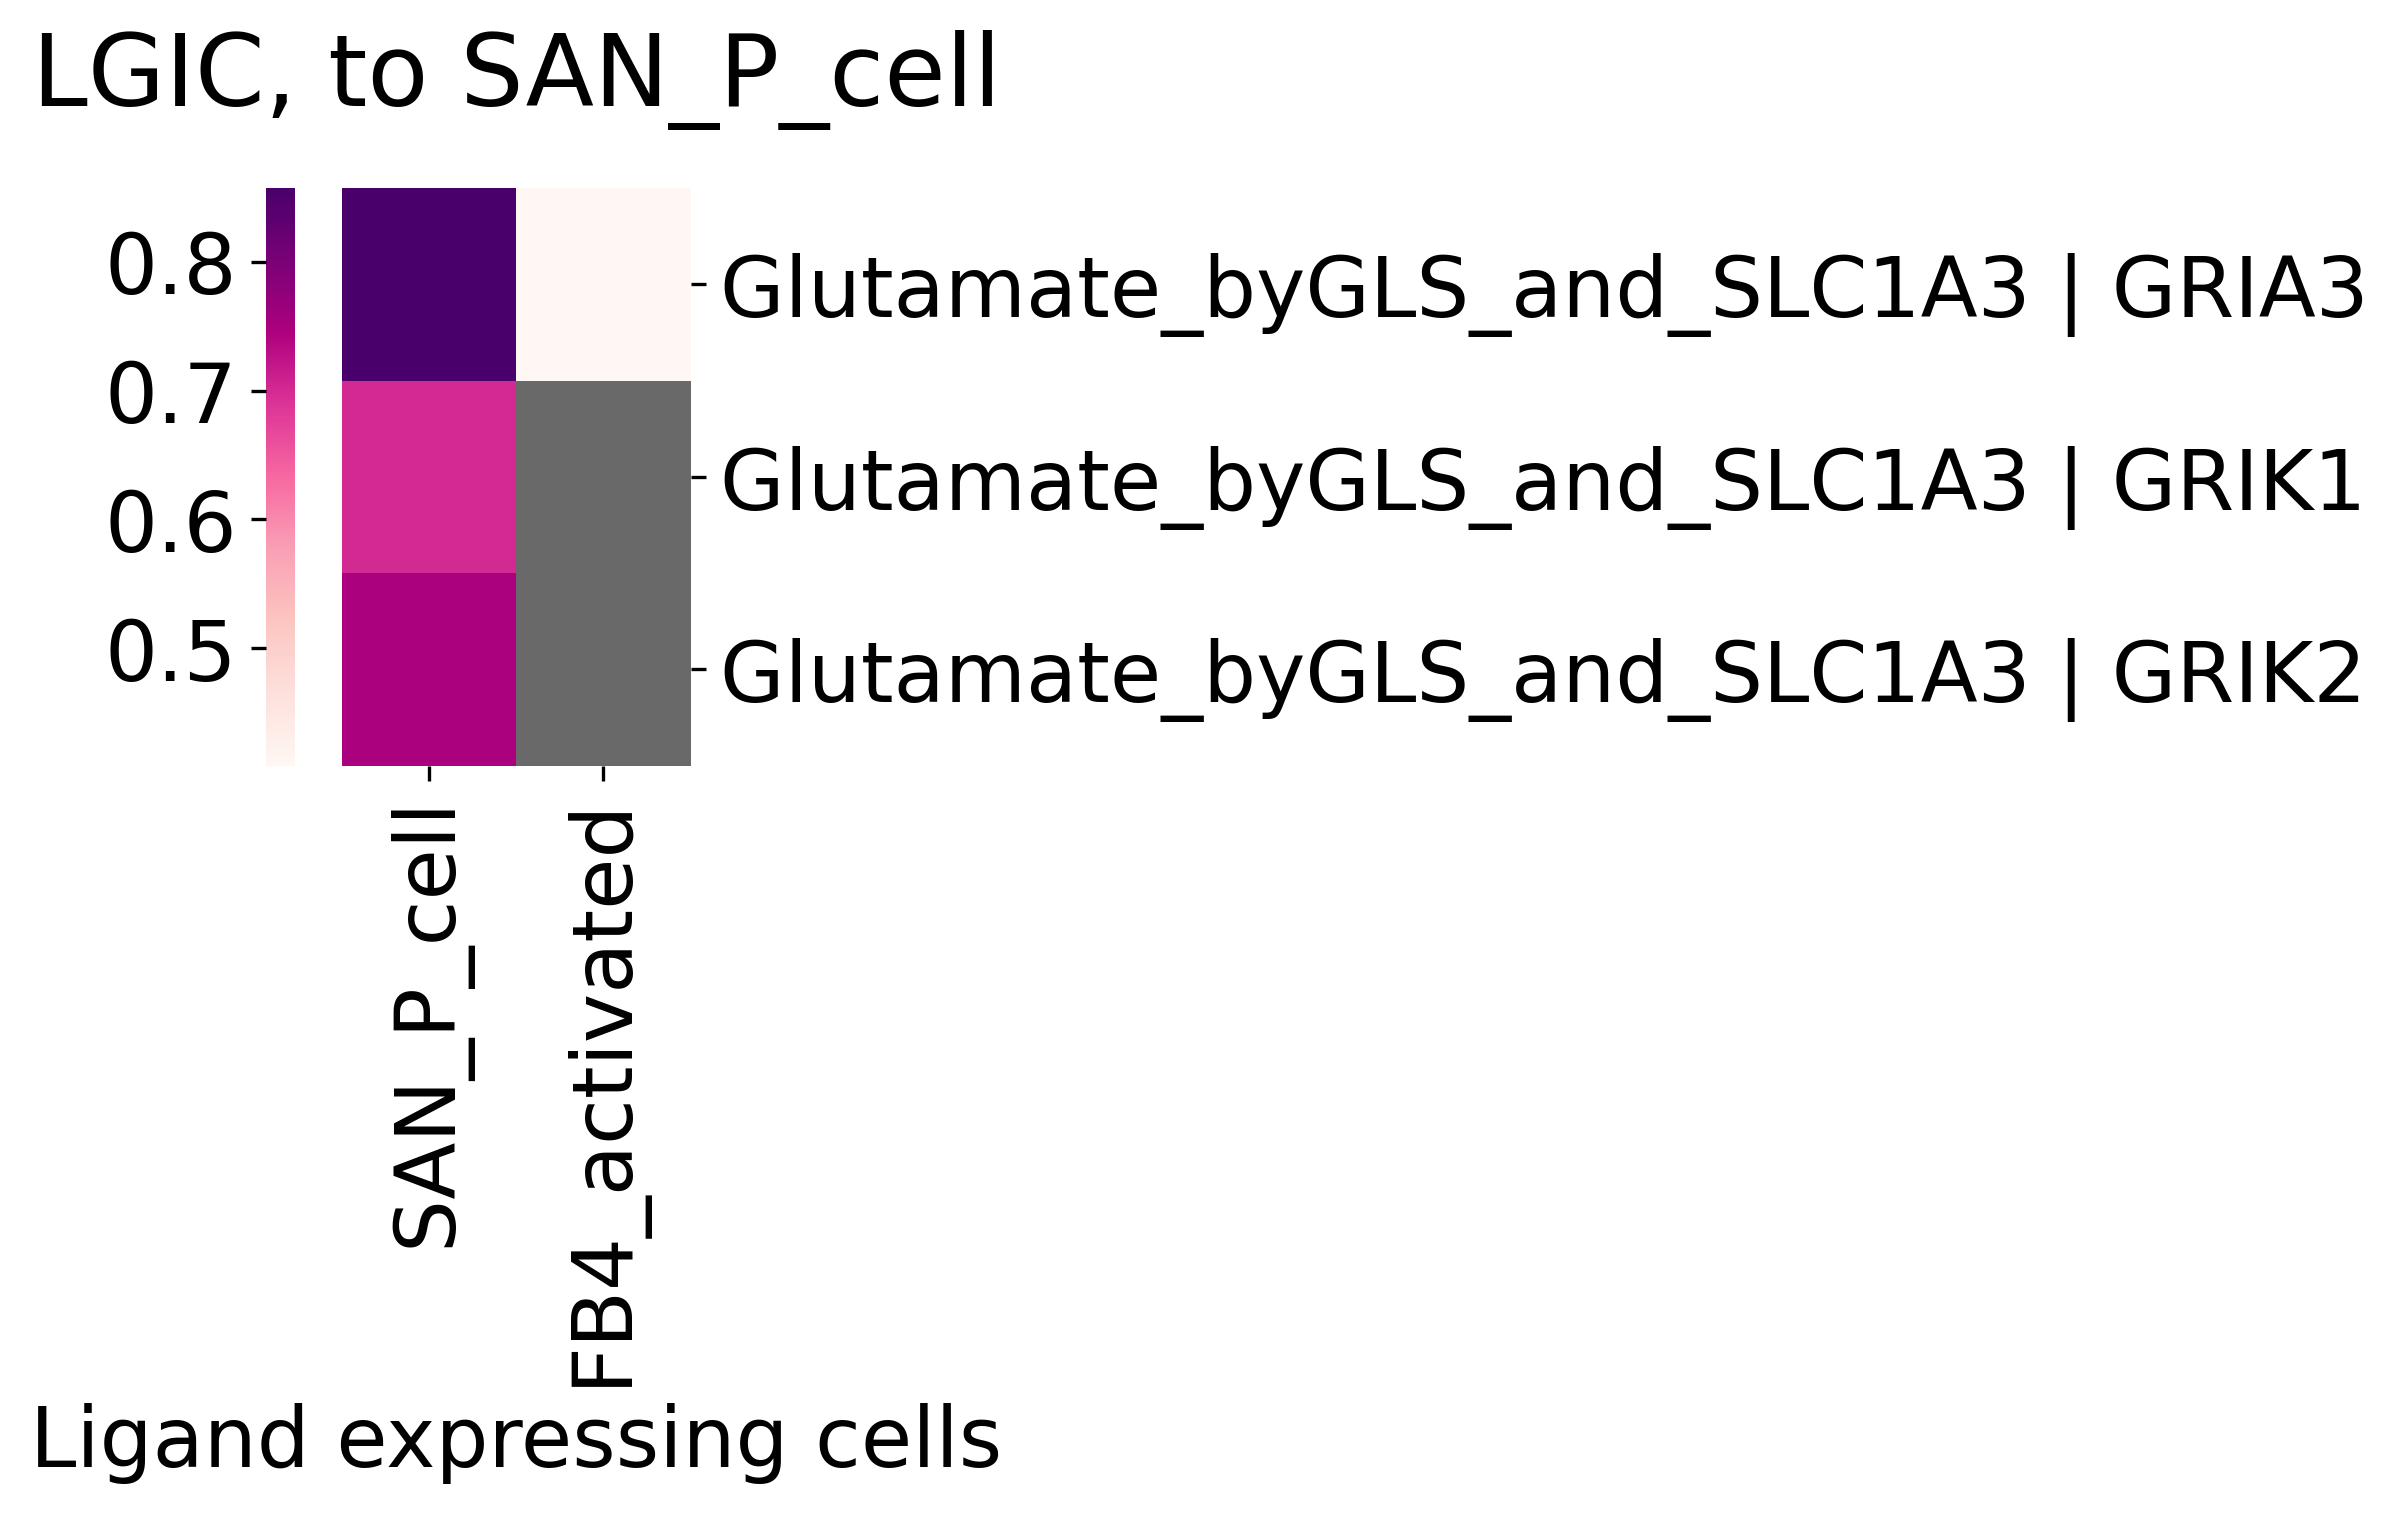

In [25]:
path_to_cpdb = '/nfs/team205/heart/cellphonedb/SAN_onlymicroenv_SAN_0.1'

cpdbout_means = pd.read_table(f'{path_to_cpdb}/means.txt',index_col=0)
cpdbout_pvals = pd.read_table(f'{path_to_cpdb}/pvalues.txt',index_col=0)

post_cpdb.plot_CCI(cpdbout_means = cpdbout_means,
         target_celltype = 'SAN_P_cell',
         ligand_or_receptor = 'receptor',
         cpdbout_pvals = cpdbout_pvals,
         pvelue_thresh = 0.05,
         mean_thresh=0,
         category_column = ['LGIC'],
         interaction_metadata = interaction_metadata,
         microenvcells_to_plot = ['SAN_P_cell', 'NC2_glial_NGF+','FB4_activated'],
         fig_width=2,
             fig_hight=2.5,
         title='LGIC, to SAN_P_cell',
         title_fontsize=24,
         title_hight=1.1
        )

plt.savefig(f'{fig_dir}/CCI_SAN_LGIC-toSANP.pdf',
            bbox_inches='tight')

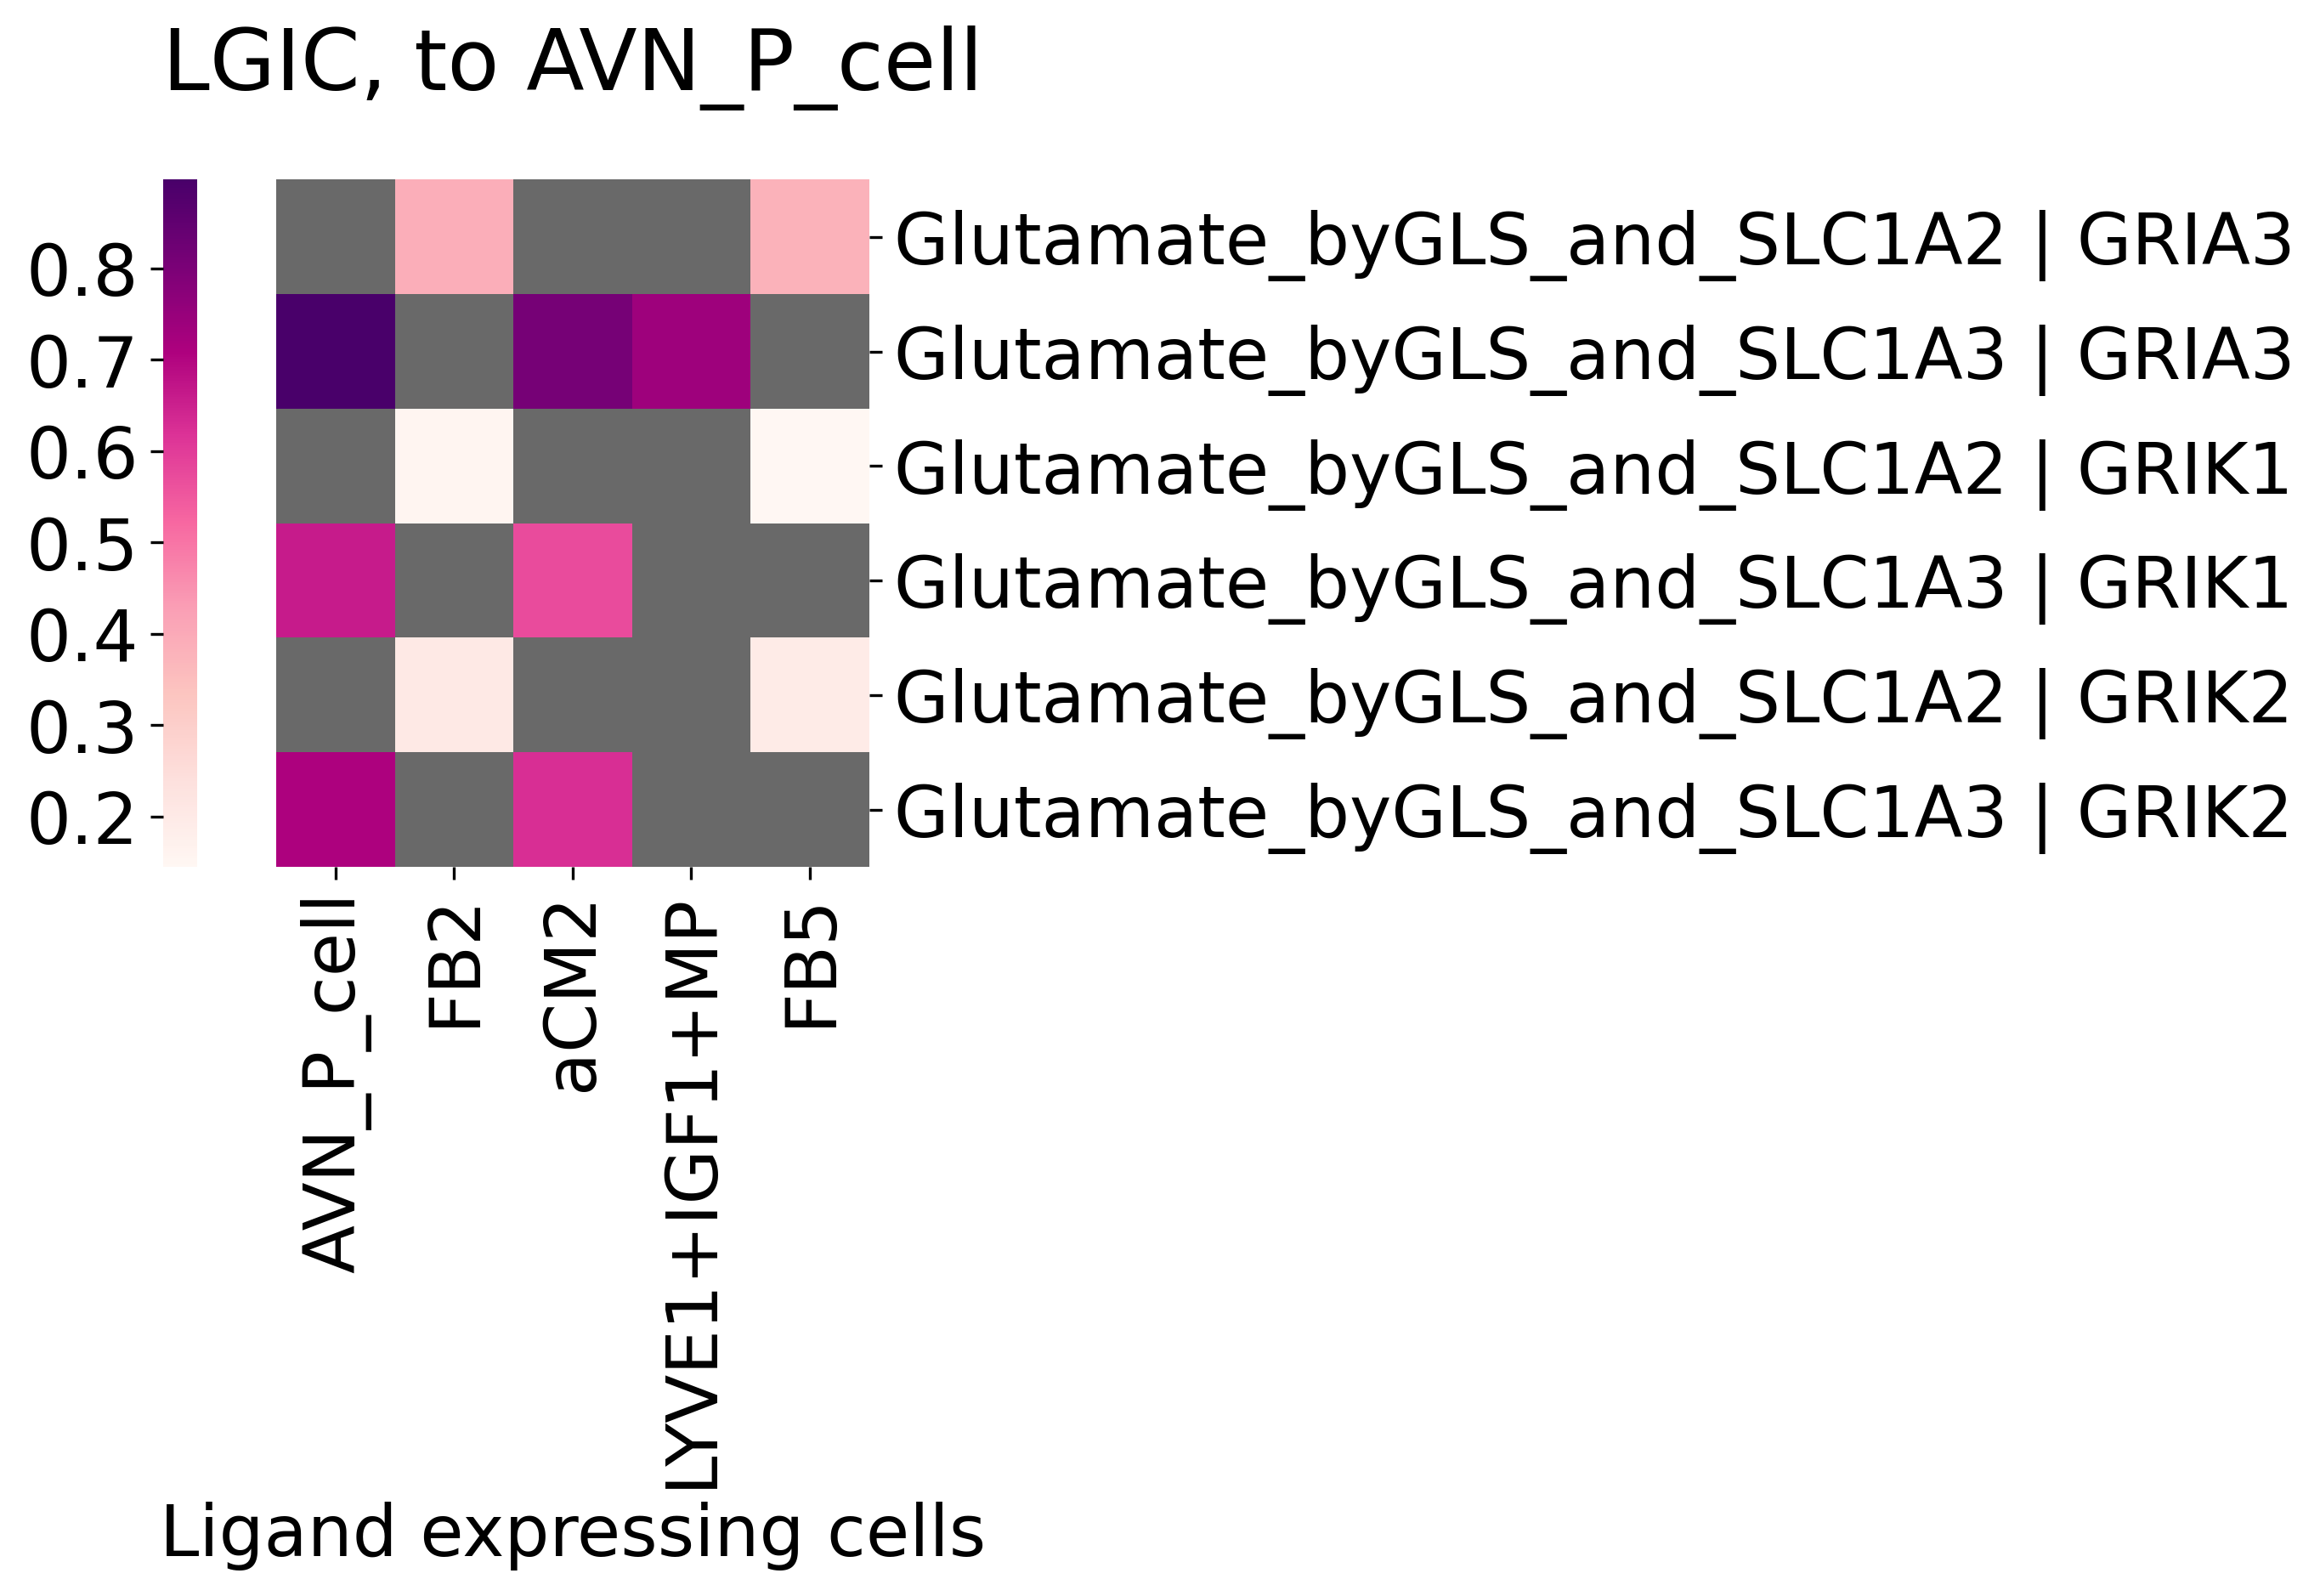

In [88]:
path_to_cpdb = '/nfs/team205/heart/cellphonedb/AVN_onlymicroenv_AVN_0.1'

cpdbout_means = pd.read_table(f'{path_to_cpdb}/means.txt',index_col=0)
cpdbout_pvals = pd.read_table(f'{path_to_cpdb}/pvalues.txt',index_col=0)

post_cpdb.plot_CCI(cpdbout_means = cpdbout_means,
         target_celltype = 'AVN_P_cell',
         ligand_or_receptor = 'receptor',
         cpdbout_pvals = cpdbout_pvals,
         pvelue_thresh = 0.05,
         mean_thresh=0,
         category_column = ['LGIC'],
         interaction_metadata = interaction_metadata,
         microenvcells_to_plot = ['AVN_P_cell',
                                 'NC2_glial_NGF+',
                                 'FB2',
                                 'aCM2',
                                 'LYVE1+IGF1+MP',
                                 'SMC1_basic',
                                 'SMC2_art',
                                 'FB5',
                                 'Mast',
                                 'FB1'],
         fig_width=4,
             fig_hight=3.5,
         title='LGIC, to AVN_P_cell',
         title_fontsize=24,
         title_hight=1.1
        )

plt.savefig(f'{fig_dir}/CCI_AVN_LGIC-toAVNP.pdf',
            bbox_inches='tight')

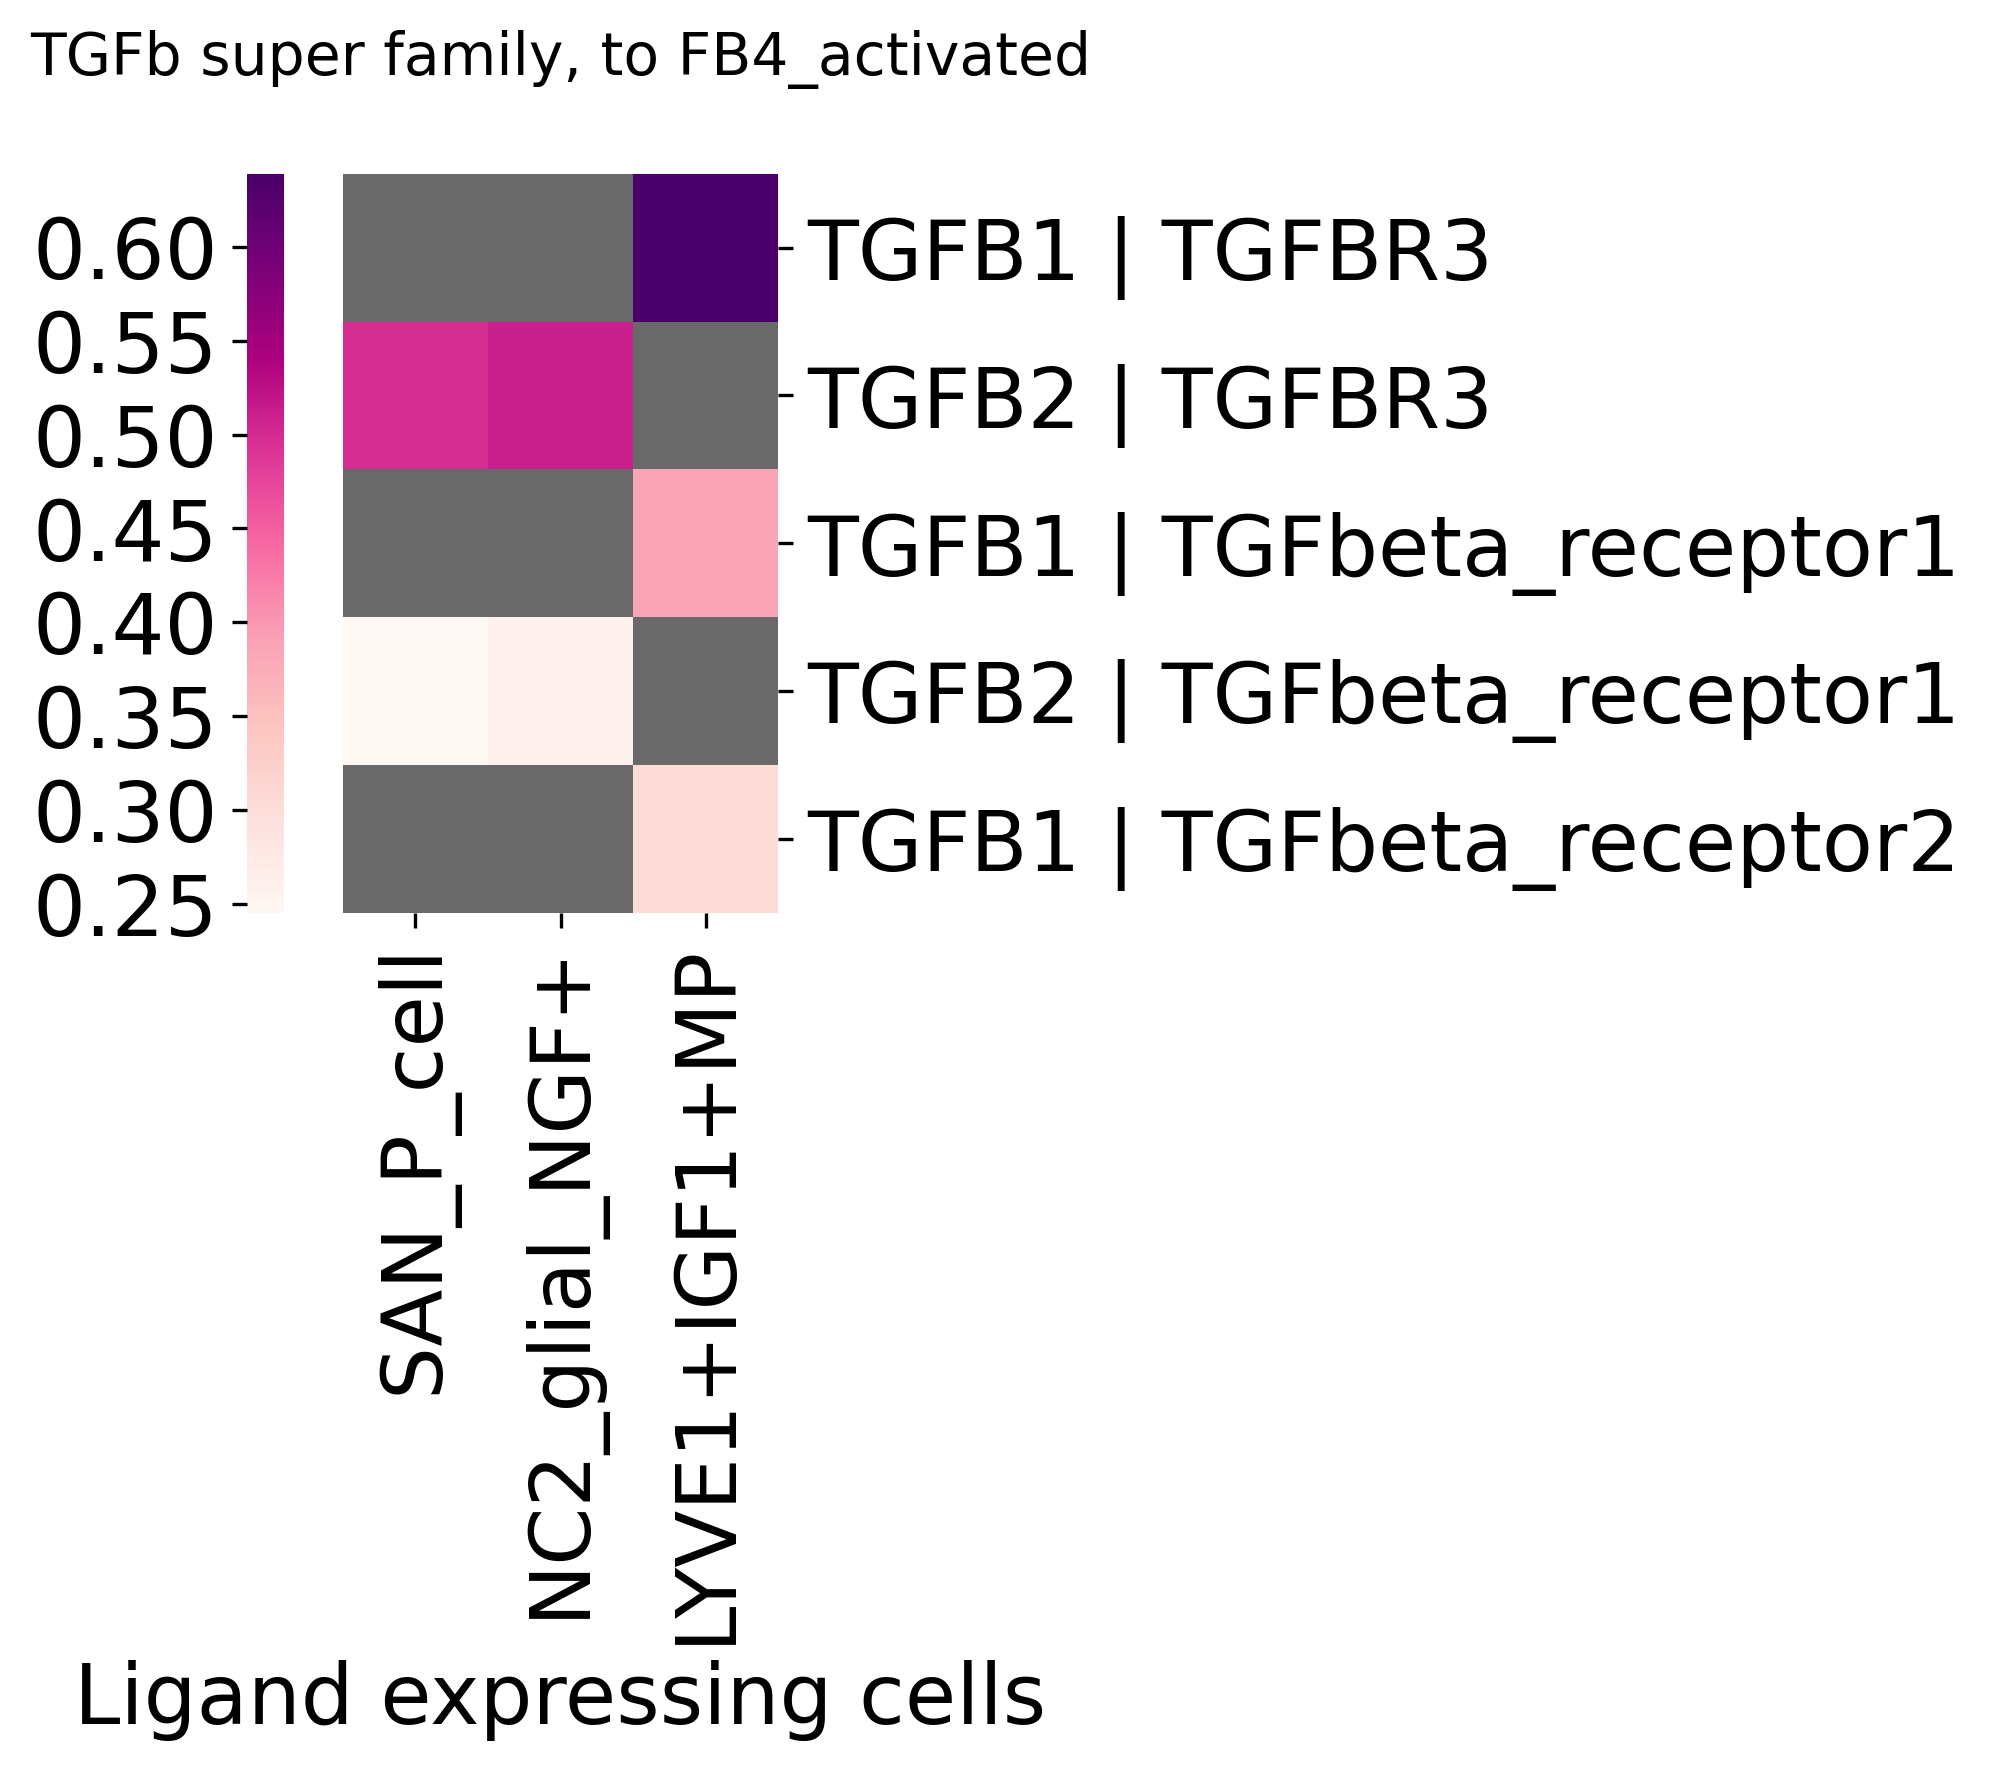

In [19]:
path_to_cpdb = '/nfs/team205/heart/cellphonedb/SAN_onlymicroenv_SAN_0.1'

cpdbout_means = pd.read_table(f'{path_to_cpdb}/means.txt',index_col=0)
cpdbout_pvals = pd.read_table(f'{path_to_cpdb}/pvalues.txt',index_col=0)

post_cpdb.plot_CCI(cpdbout_means = cpdbout_means,
         target_celltype = 'FB4_activated',
         ligand_or_receptor = 'receptor',
         cpdbout_pvals = cpdbout_pvals,
         pvelue_thresh = 0.05,
         mean_thresh=0,
         category_column = ['Transforming growth factor beta family'],
         interaction_metadata = interaction_metadata,
         microenvcells_to_plot = ['SAN_P_cell', 'NC2_glial_NGF+','FB4_activated','FB2','FB5','LYVE1+IGF1+MP'],
         fig_width=2.5,
             fig_hight=3.2,
         title='TGFb super family, to FB4_activated',
         title_fontsize=14,
         title_hight=1.1
        )

plt.savefig(f'{fig_dir}/CCI_SAN_Tgfb-toFB4.pdf',
           bbox_inches='tight')

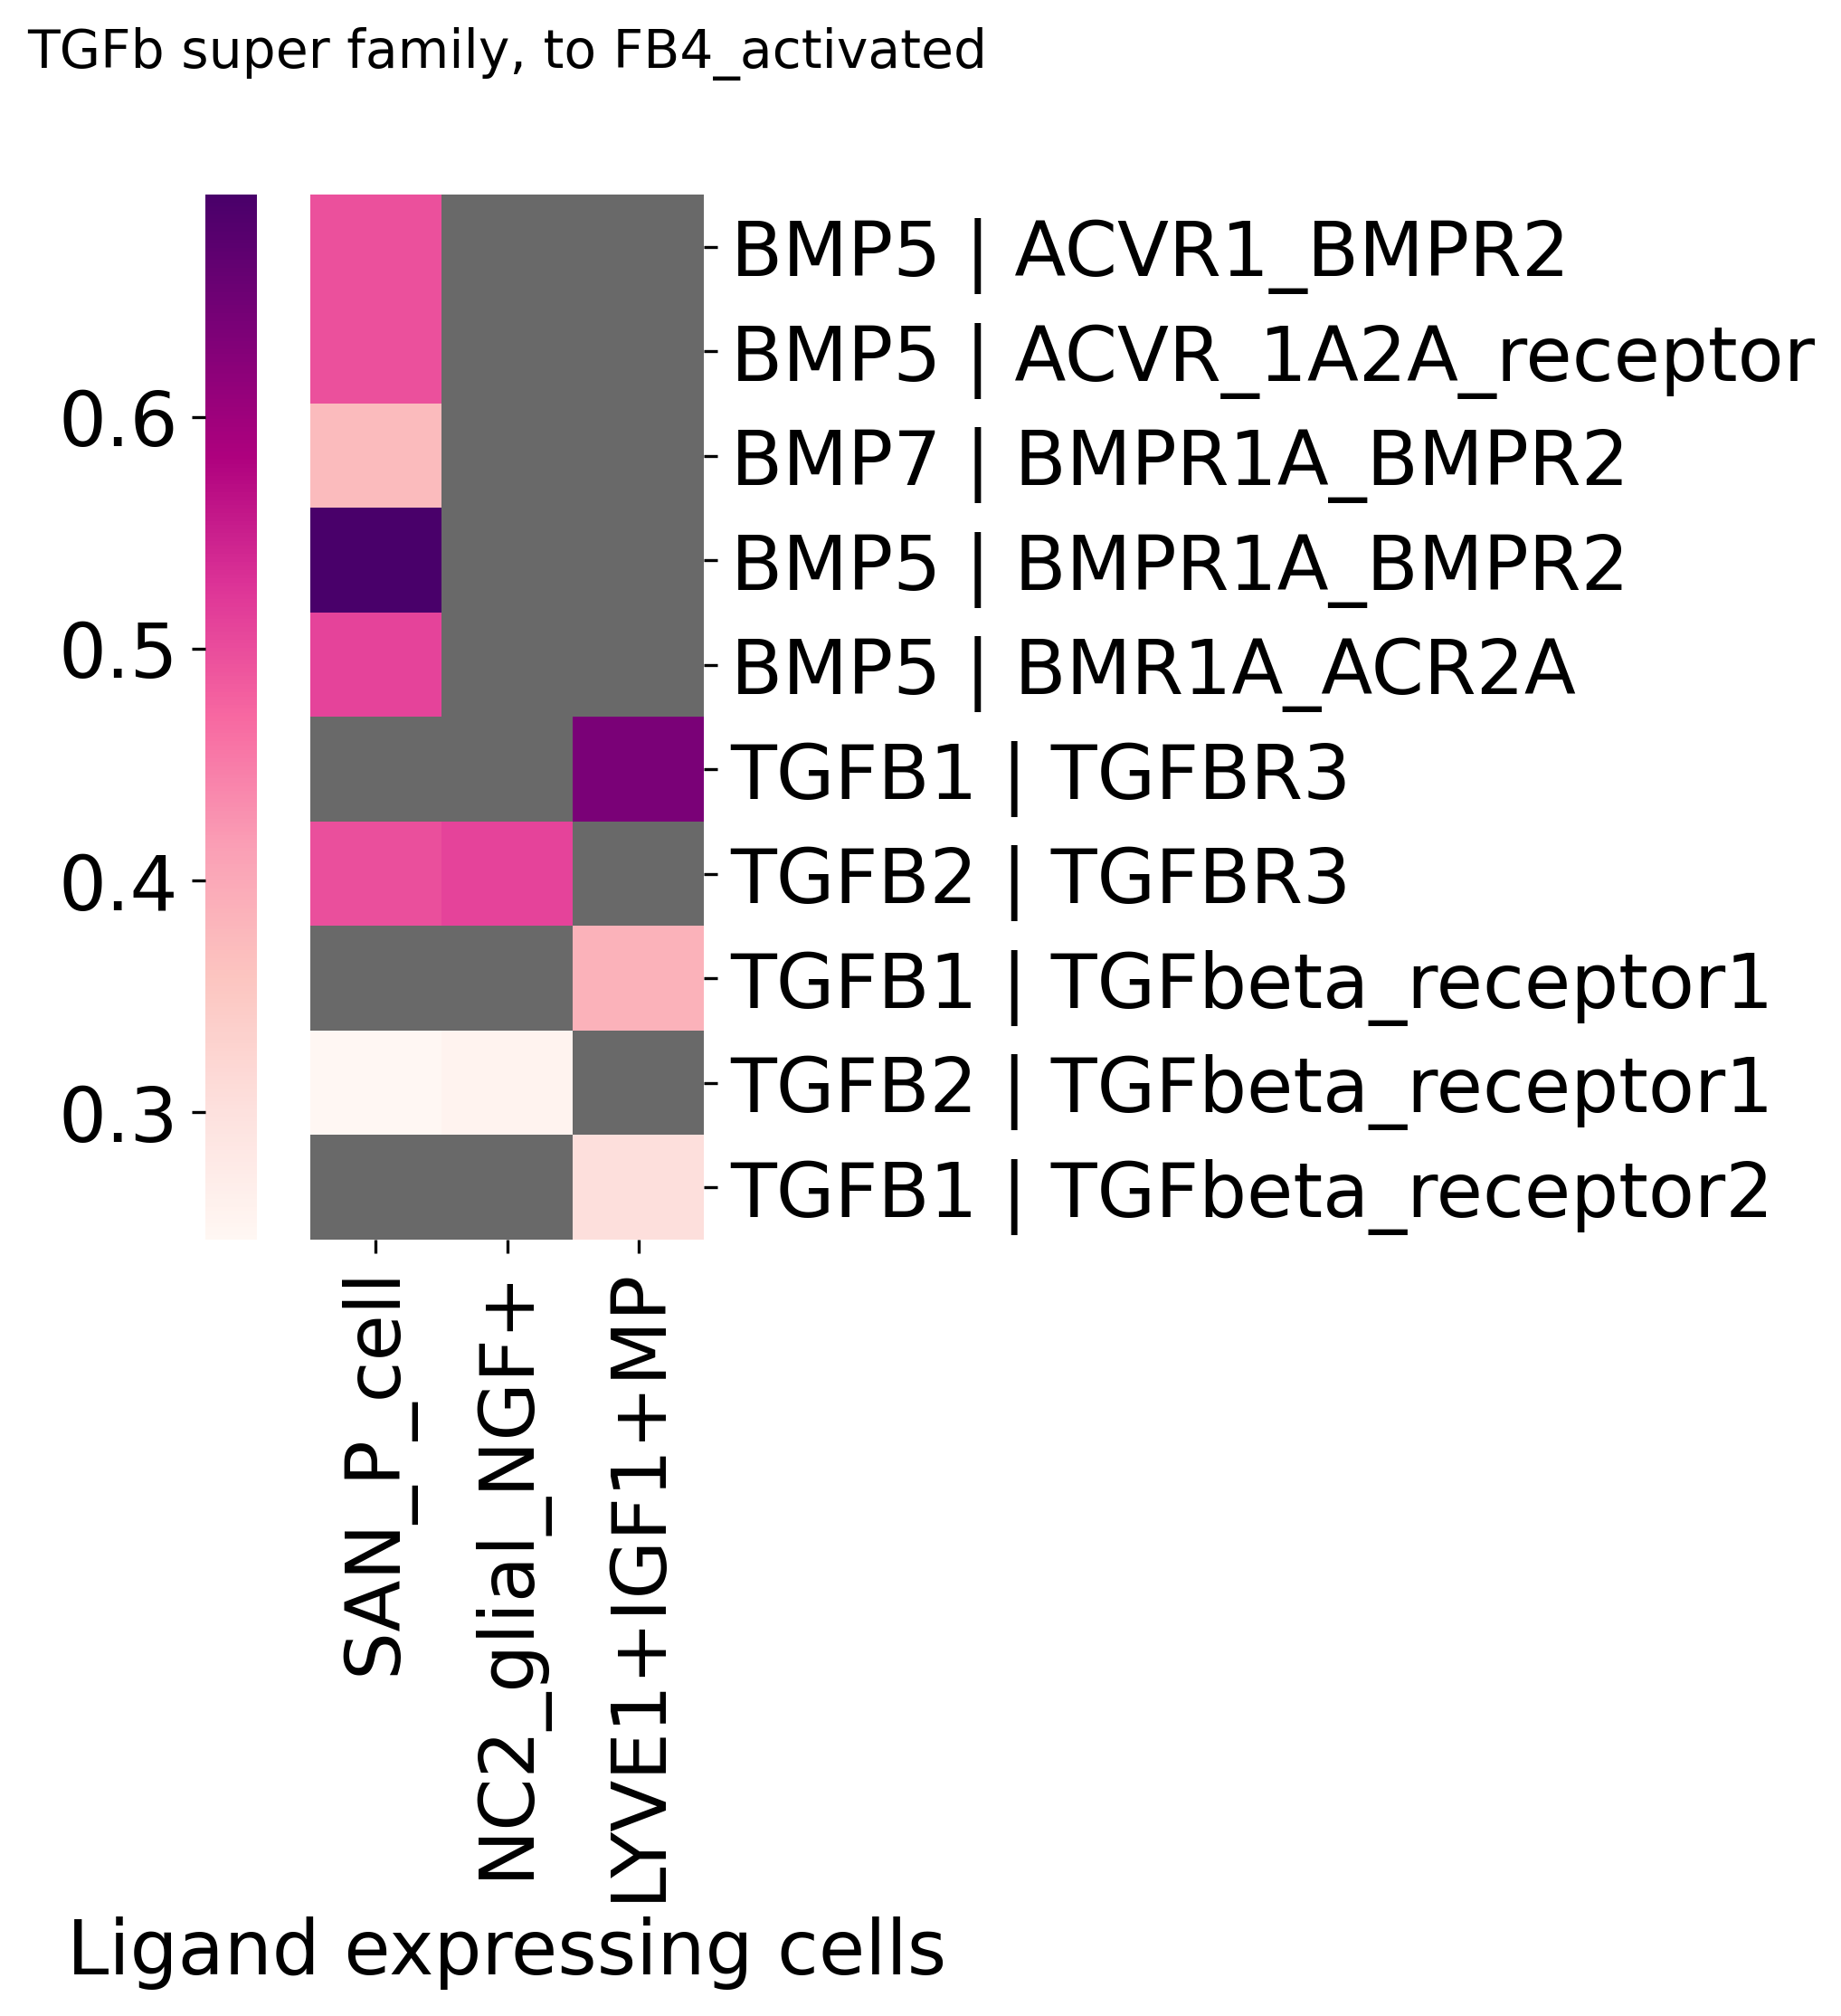

In [18]:
path_to_cpdb = '/nfs/team205/heart/cellphonedb/SAN_onlymicroenv_SAN_0.1'

cpdbout_means = pd.read_table(f'{path_to_cpdb}/means.txt',index_col=0)
cpdbout_pvals = pd.read_table(f'{path_to_cpdb}/pvalues.txt',index_col=0)

post_cpdb.plot_CCI(cpdbout_means = cpdbout_means,
         target_celltype = 'FB4_activated',
         ligand_or_receptor = 'receptor',
         cpdbout_pvals = cpdbout_pvals,
         pvelue_thresh = 0.05,
         mean_thresh=0,
         category_column = ['TGFb-sf_GID1932'],
         interaction_metadata = interaction_metadata,
         microenvcells_to_plot = ['SAN_P_cell', 'NC2_glial_NGF+','FB4_activated','FB2','FB5','LYVE1+IGF1+MP'],
         fig_width=2.5,
             fig_hight=5,
         title='TGFb super family, to FB4_activated',
         title_fontsize=14,
         title_hight=1.1
        )

# plt.savefig(f'{fig_dir}/CCI_SAN_Tgfb-toFB4.pdf',
#            bbox_inches='tight')